# **Spotify Music Recommendation**

## **Introduction**

This project aims to build a Spotify Music Recommendation System using content-based filtering, leveraging track-specific audio features to recommend songs that match a given input track.

### Dataset Overview


We are working with a Spotify dataset that contains various audio and metadata features of songs. Key attributes in our dataset include:




#### Numerical Features (Audio-Based Characteristics):

> Danceability – Measures how suitable a track is for dancing (0.0 to 1.0).

> Energy – Represents song intensity and activity (0.0 to 1.0).

>Valence – Indicates musical positivity (happiness/sadness) (0.0 to 1.0).

>Tempo – Speed of the track in beats per minute (BPM).

>Speechiness – Detects the presence of spoken words (0.0 to 1.0).

>Liveness – Estimates if a song was recorded live (0.0 to 1.0).

>Acousticness – Measures the likelihood of an acoustic track (0.0 to 1.0).

>Instrumentalness – Predicts if a track has no vocals (0.0 to 1.0).

>Loudness – Measures the decibel level of a song.

>Duration (ms) – Length of the song in milliseconds.



#### Categorical Features:

> Key – Musical key of the track (0–11, where 0 = C, 1 = C#, etc.).

>Mode – Major (1) or minor (0) tonality.

>Artists – Name(s) of the performing artist(s), encoded using frequency encoding.

>Release Date – Encoded using label encoding for numerical representation.

>Popularity Feature:

>Popularity – A score (0–100) representing the track's streaming performance on Spotify.

#### Project Workflow

1. Data Preprocessing:

>Handled missing values (e.g., filled missing tempo values using the median).

>Encoded categorical features (artists, release date) for model compatibility.

>Scaled numerical features using MinMaxScaler to ensure consistency.

>Removed outliers from key features (tempo, speechiness, liveness, duration, popularity) using IQR method.

2.Feature Selection & Dimensionality Reduction:

>Variance Thresholding to remove low-variance features.

>Principal Component Analysis (PCA) to retain only the most informative components.

3. Similarity Computation & Recommendation:

>Used Euclidean distance to measure song similarity.

>Based on an input track, recommended songs with the most similar feature profiles.

#### Objective

Our goal is to build a robust and efficient music recommendation system that suggests songs based on their audio characteristics, helping users discover music aligned with their preferences. Unlike collaborative filtering, which relies on user interactions, our approach focuses purely on song attributes, making it ideal for recommending songs even when user history is unavailable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\haris\\Downloads\\spotify dataset.csv", encoding='ISO-8859-1', low_memory=False)

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


some basic information about the data

In [5]:
df.shape

(170638, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170638 non-null  float64
 1   year              170638 non-null  int64  
 2   acousticness      170638 non-null  float64
 3   artists           170638 non-null  object 
 4   danceability      170638 non-null  float64
 5   duration_ms       170638 non-null  int64  
 6   energy            170638 non-null  float64
 7   explicit          170638 non-null  int64  
 8   id                170638 non-null  object 
 9   instrumentalness  170638 non-null  float64
 10  key               170638 non-null  int64  
 11  liveness          170638 non-null  float64
 12  loudness          170638 non-null  float64
 13  mode              170638 non-null  int64  
 14  name              170638 non-null  object 
 15  popularity        170638 non-null  object 
 16  release_date      17

# Data Preprocessing

### Data Cleaning

In [14]:
df.isnull().sum()

valence                  0
year                     0
acousticness             0
artists                  0
danceability             0
duration_ms              0
energy                   0
explicit                 0
id                       0
instrumentalness         0
key                      0
liveness                 0
loudness                 0
mode                     0
name                     0
popularity               0
release_date             0
speechiness              0
tempo                  546
Unnamed: 19         170631
Unnamed: 20         170633
Unnamed: 21         170633
Unnamed: 22         170633
Unnamed: 23         170633
Unnamed: 24         170633
Unnamed: 25         170633
Unnamed: 26         170633
Unnamed: 27         170633
Unnamed: 28         170633
Unnamed: 29         170633
Unnamed: 30         170635
dtype: int64

<Axes: >

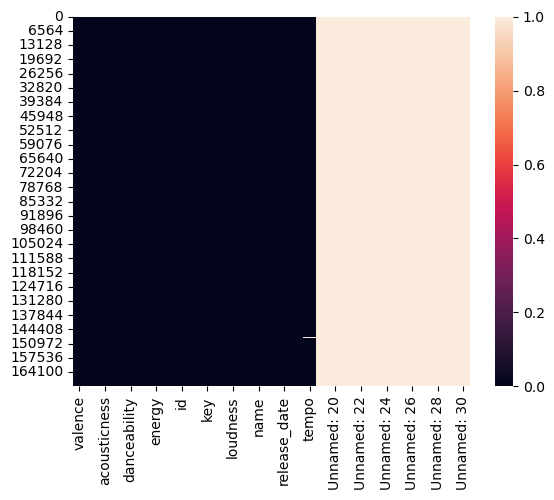

In [16]:
sns.heatmap(df.isnull(),cbar='False')

In [17]:
#delete all the Unnamed columns from the data
df=df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [18]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [19]:
df.shape

(170638, 19)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,170638.0,0.528590,0.263168,0.0,0.3170,0.540000,0.74700,1.000
year,170638.0,1976.785265,25.917277,1921.0,1956.0000,1977.000000,1999.00000,2020.000
acousticness,170638.0,0.502124,0.376034,0.0,0.1020,0.516000,0.89300,0.996
danceability,170638.0,0.537393,0.176133,0.0,0.4150,0.548000,0.66800,0.988
duration_ms,170638.0,230945.123068,126119.657677,5108.0,169827.0000,207456.500000,262400.00000,5403500.000
energy,170638.0,0.482383,0.267648,0.0,0.2550,0.471000,0.70300,1.000
explicit,170638.0,0.084571,0.278243,0.0,0.0000,0.000000,0.00000,1.000
instrumentalness,170638.0,0.167010,0.313475,0.0,0.0000,0.000216,0.10200,1.000
key,170638.0,5.199838,3.515076,0.0,2.0000,5.000000,8.00000,11.000
liveness,170638.0,0.205845,0.174809,0.0,0.0988,0.136000,0.26100,1.000


In [26]:
print(df.count())

valence             170638
year                170638
acousticness        170638
artists             170638
danceability        170638
duration_ms         170638
energy              170638
explicit            170638
id                  170638
instrumentalness    170638
key                 170638
liveness            170638
loudness            170638
mode                170638
name                170638
popularity          170638
release_date        170638
speechiness         170638
tempo               170092
dtype: int64


<Axes: xlabel='tempo', ylabel='Count'>

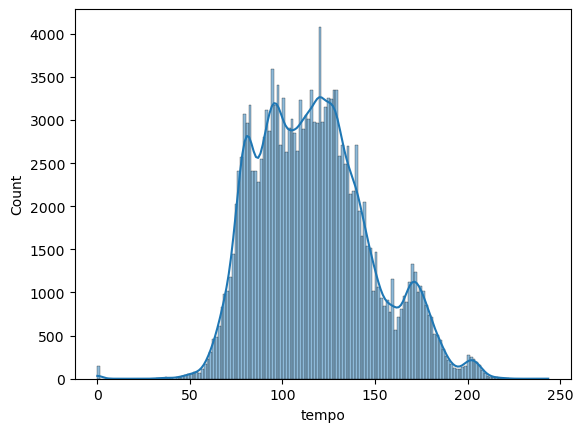

In [28]:
sns.histplot(df['tempo'].dropna(),kde=True)

In [30]:
#fill missing values in column tempo with median(distribution is skewed)
df['tempo']=df['tempo'].fillna(df['tempo'].median())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170638 non-null  float64
 1   year              170638 non-null  int64  
 2   acousticness      170638 non-null  float64
 3   artists           170638 non-null  object 
 4   danceability      170638 non-null  float64
 5   duration_ms       170638 non-null  int64  
 6   energy            170638 non-null  float64
 7   explicit          170638 non-null  int64  
 8   id                170638 non-null  object 
 9   instrumentalness  170638 non-null  float64
 10  key               170638 non-null  int64  
 11  liveness          170638 non-null  float64
 12  loudness          170638 non-null  float64
 13  mode              170638 non-null  int64  
 14  name              170638 non-null  object 
 15  popularity        170638 non-null  object 
 16  release_date      17

### Data Type Conversion and Categorical Encoding



In [34]:
#Convert 'popularity' to numeric 
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')


In [36]:
#Label encoding for 'release_date'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['release_date_encoded'] = le.fit_transform(df['release_date'])


In [38]:
# Frequency Encoding for 'artist'
artist_freq = df['artists'].value_counts().to_dict()
df['artists_encoded'] = df['artists'].map(artist_freq)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170638 entries, 0 to 170637
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   valence               170638 non-null  float64
 1   year                  170638 non-null  int64  
 2   acousticness          170638 non-null  float64
 3   artists               170638 non-null  object 
 4   danceability          170638 non-null  float64
 5   duration_ms           170638 non-null  int64  
 6   energy                170638 non-null  float64
 7   explicit              170638 non-null  int64  
 8   id                    170638 non-null  object 
 9   instrumentalness      170638 non-null  float64
 10  key                   170638 non-null  int64  
 11  liveness              170638 non-null  float64
 12  loudness              170638 non-null  float64
 13  mode                  170638 non-null  int64  
 14  name                  170638 non-null  object 
 15  

### Outlier Detection & Handling

#### Boxplot Visualization for Outlier Detection in Music Features

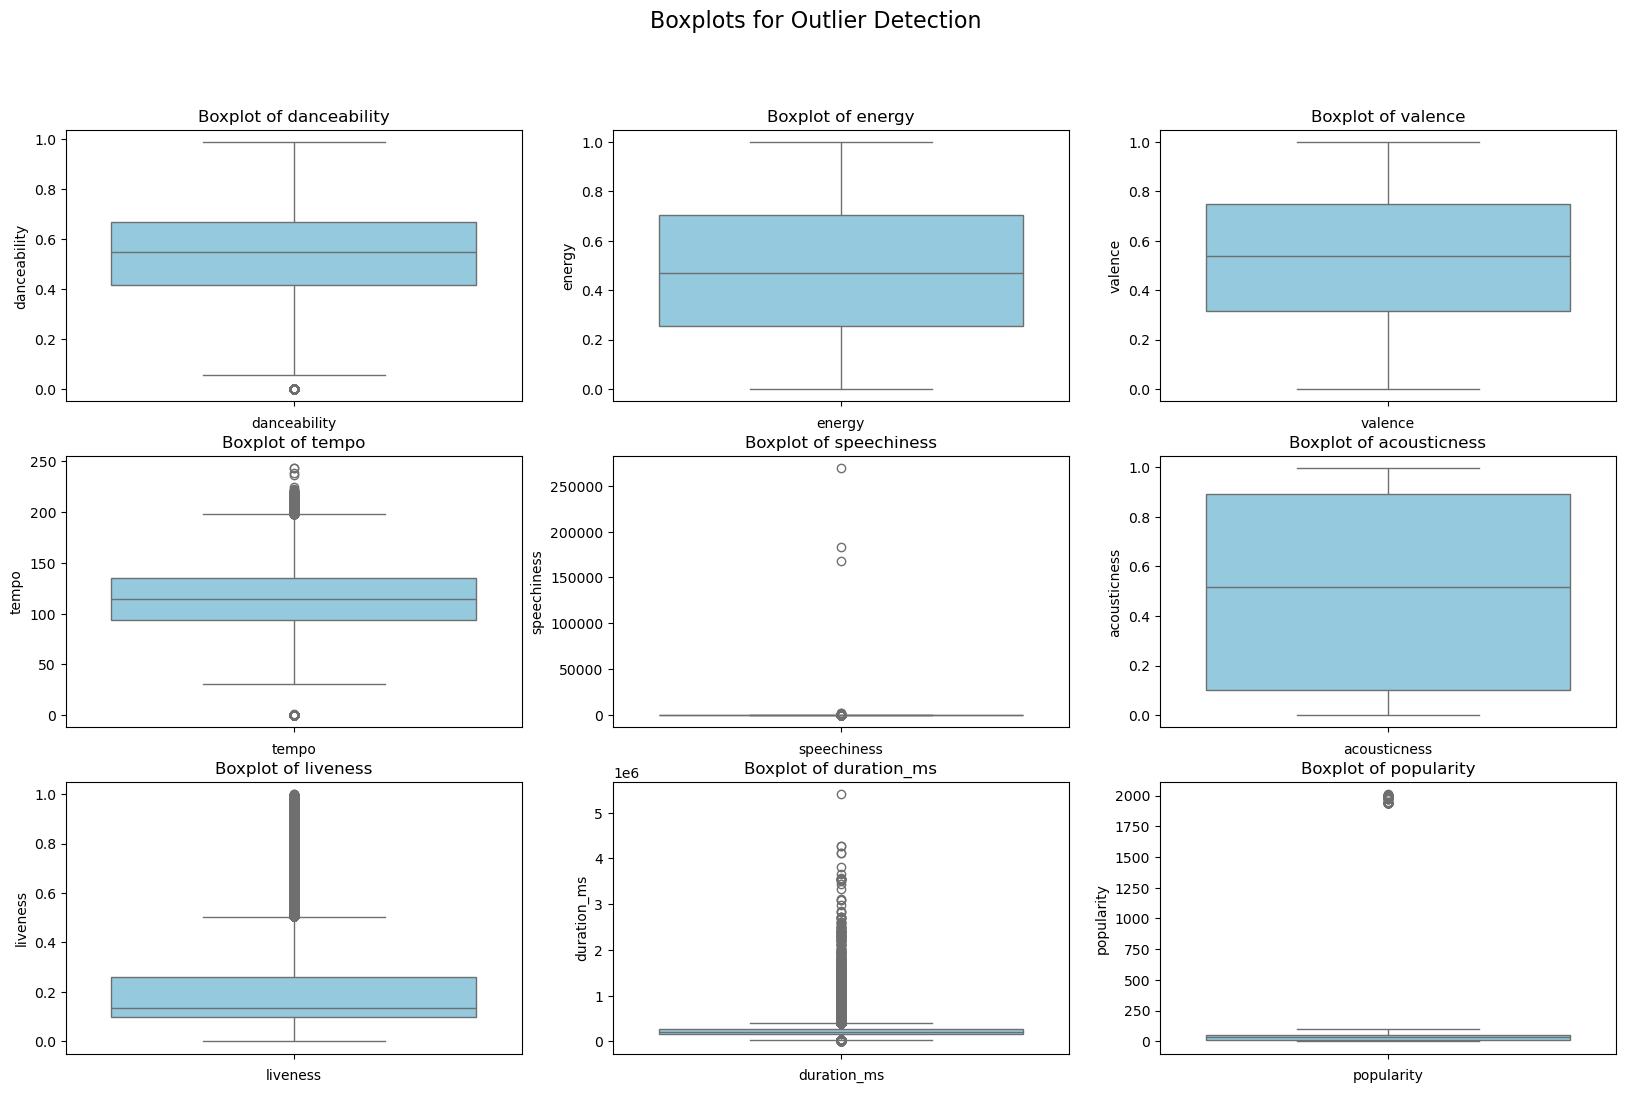

In [44]:
features = ['danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness', 'liveness', 'duration_ms', 'popularity']

plt.figure(figsize=(20, 12))
plt.suptitle('Boxplots for Outlier Detection', fontsize=16)

# Plot each feature as a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)



In [45]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f'{feature}: Removing values outside [{lower_bound:.2f}, {upper_bound:.2f}]')
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [46]:
# Remove outliers for each feature
outlier_features = ['tempo', 'speechiness', 'liveness', 'duration_ms', 'popularity']
for feature in outlier_features:
    df = remove_outliers(df, feature)
    

tempo: Removing values outside [30.60, 198.35]
speechiness: Removing values outside [-0.03, 0.14]
liveness: Removing values outside [-0.13, 0.47]
duration_ms: Removing values outside [37172.50, 398240.50]
popularity: Removing values outside [-34.50, 97.50]


In [673]:
print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (127497, 20)


### Feature scaling

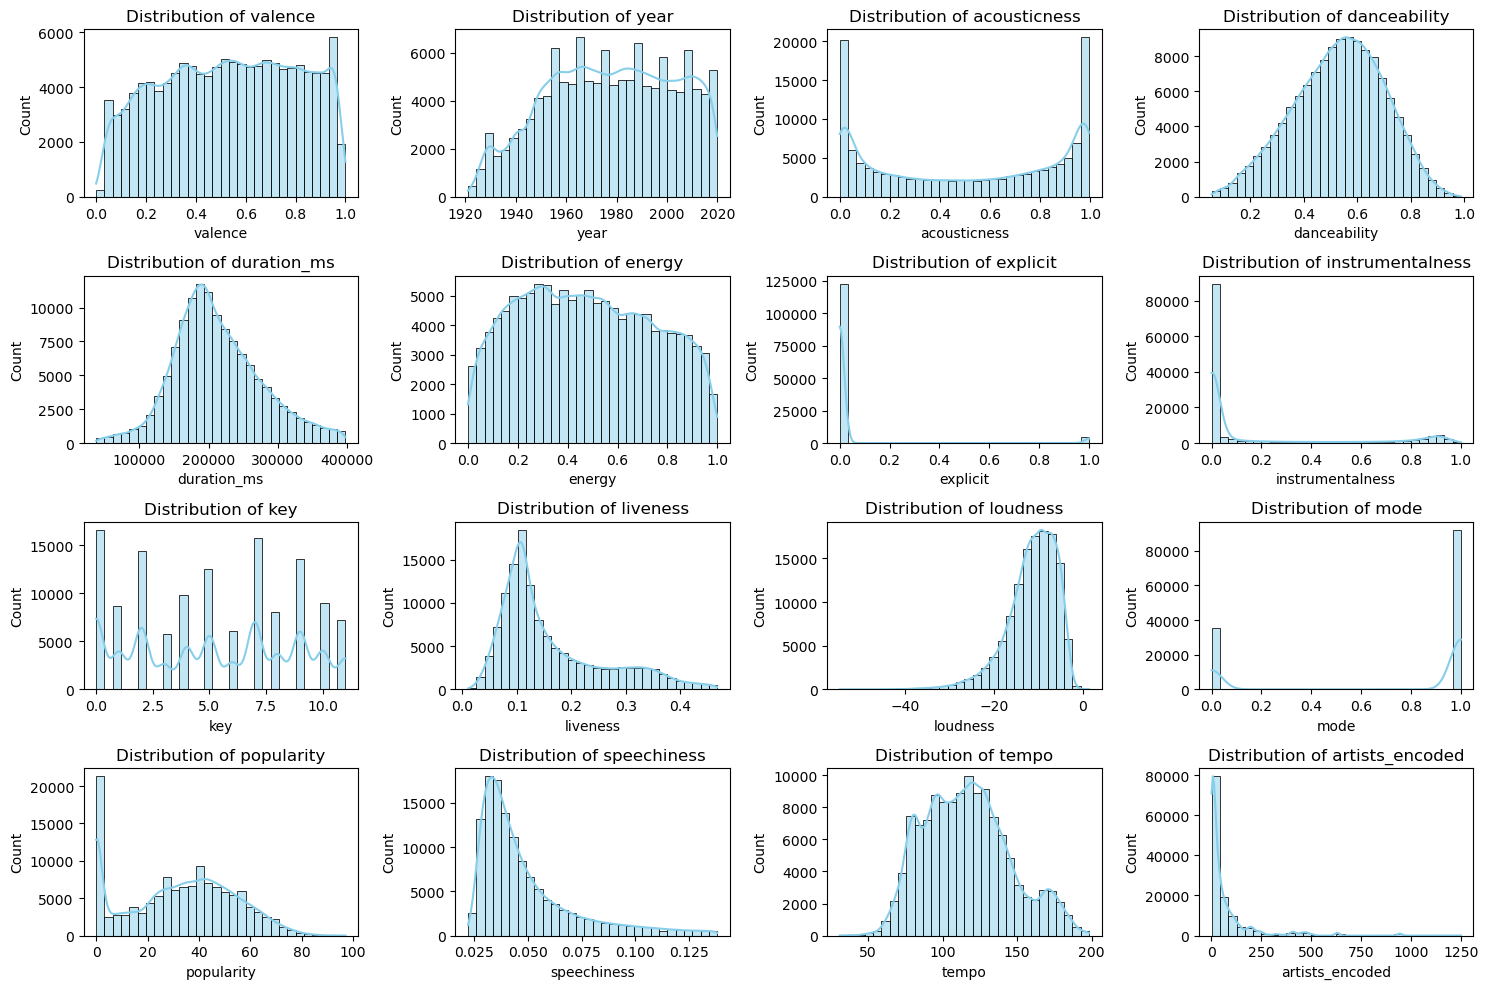

In [538]:
features = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

After examining the distributions of features, it’s clear that these variables exhibit non-normal, often skewed distributions with wide or bounded ranges. Using Min-Max Scaling is ideal in this context because it rescales each feature into the [0, 1] range while preserving the inherent distribution shape.

In [71]:
from sklearn.preprocessing import MinMaxScaler


columns_to_scale =['danceability','duration_ms','energy','valence','liveness','loudness','popularity','speechiness','tempo']
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[columns_to_scale])


In [73]:
df.shape

(127497, 21)

### Feature Selection

Correlation Analysis for Feature Selection: Identifying and Removing Highly Correlated Features

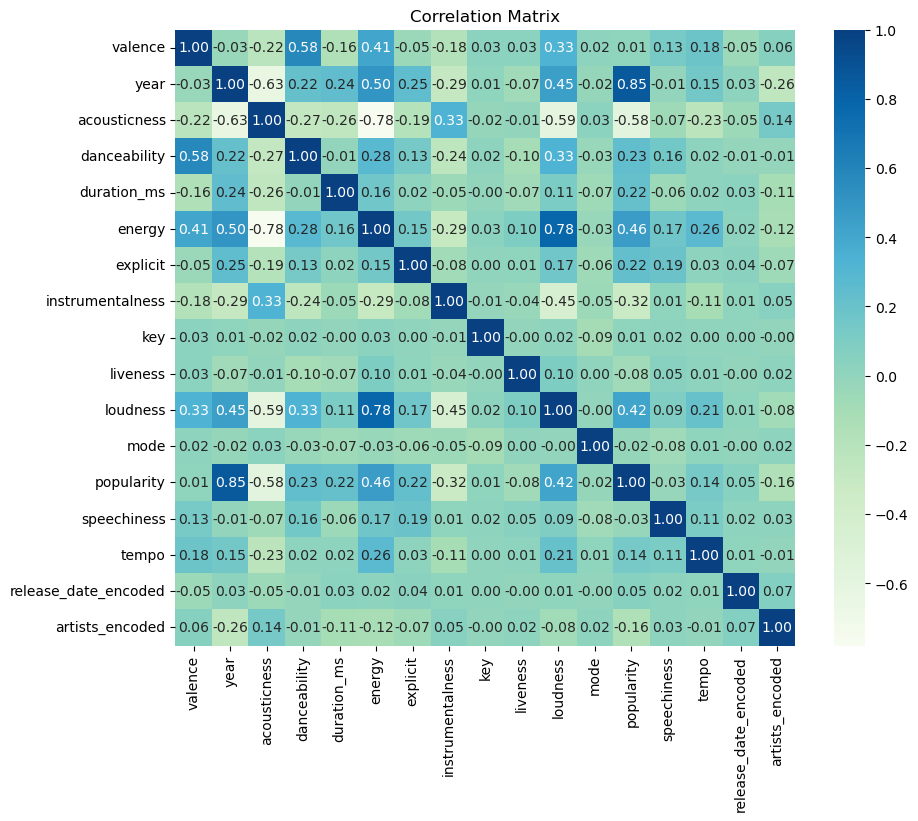

In [50]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number', 'float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [51]:
# Identify pairs of highly correlated features 
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)


Highly correlated features to remove: set()


## **Recommendation System**

## Model Selection

### 1.Content Based Filtering

In this project, we implement a Content-Based Filtering approach to recommend songs based on their inherent characteristics. Unlike collaborative filtering, which relies on user interactions, content-based filtering analyzes song attributes such as danceability, energy, tempo, acousticness, and more to determine similarity between tracks.

The goal is to generate recommendations by comparing songs based on their features, ensuring that similar-sounding tracks are suggested to users. This approach enables personalized and relevant recommendations without requiring user listening history.

Before building the recommendation model, it's crucial to select the most relevant features to improve accuracy and efficiency. This involves eliminating redundant or unimportant data while retaining key attributes that differentiate songs.

1. Variance Thresholding: Removing Low-Variance Features
Features with very little variation across songs contribute minimal information and can be safely removed.
This step ensures that only meaningful attributes remain, reducing noise and improving model performance.


2. Principal Component Analysis (PCA): Dimensionality Reduction
PCA helps rank features based on how much variance they explain, allowing us to focus on the most important aspects of the music.
By reducing dimensionality, we retain essential song characteristics while improving computational efficiency.

In [54]:
from sklearn.feature_selection import VarianceThreshold

In [56]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

In [58]:
feature_variance = numerical_features.var()
print(feature_variance)

valence             7.108016e-02
year                6.215504e+02
acousticness        1.409473e-01
danceability        2.865571e-02
duration_ms         4.106135e+09
energy              7.014729e-02
explicit            3.655711e-02
instrumentalness    1.002453e-01
key                 1.219473e+01
liveness            9.231360e-03
loudness            3.110255e+01
mode                2.005218e-01
popularity          4.508533e+02
speechiness         5.307673e-04
tempo               8.355318e+02
artists_encoded     1.580684e+04
dtype: float64


In [60]:
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(numerical_features)

In [62]:
selected_feature_names = numerical_features.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'loudness', 'mode',
       'popularity', 'tempo', 'artists_encoded'],
      dtype='object')


In [75]:
from sklearn.decomposition import PCA

In [77]:
pca=PCA()
df_pca = pca.fit_transform(scaled_data )

In [79]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.33516581 0.51432283 0.64224848 0.74363276 0.82187897 0.89331169
 0.95650591 0.99132158 1.        ]


In [81]:
pca = PCA(n_components=0.9)  
df_pca = pca.fit_transform(scaled_data)

## Model Building

In [83]:
from sklearn.neighbors import NearestNeighbors

Initialize Nearest Neighbors model (using Cosine Similarity)

In [86]:
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')
nn_model.fit(scaled_data)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [88]:

def recommend_songs(song_index, top_n=5):
    distances, indices = nn_model.kneighbors([scaled_data[song_index]], n_neighbors=top_n + 1)
    recommended_indices = indices[0][1:] 
    return df.iloc[recommended_indices][['id','name','artists','valence']]

recommended_songs_cosine = recommend_songs(song_index=150, top_n=5)
print(recommended_songs_cosine)

                            id  \
109214  4esmw677I9hO3vSCMCe52y   
126015  6JzHqnHztZI9f6pjJtnKbD   
58316   5X0PNzQKPjhYIrlMPdRPv0   
58795   3IG1us40tEhtQB1M0Ng8eK   
21037   2MkpyWINrgqshNUH0vTe08   

                                                     name  \
109214                                      Bhul Kore Mor   
126015  Oedipus Rex / Actus primus: Invidia fortunam odit   
58316                                    Sous La Blafarde   
58795                      Dola Lagilo Dakhinar Bone Bone   
21037   Werther, Acte II: Lorsque l'enfant revient d'u...   

                                                  artists  valence  
109214                            ['Smt. Angurbala Devi']    0.386  
126015  ['Igor Stravinsky', 'Societe Chorale de Brassu...    0.221  
58316                                          ['Fr?hel']    0.395  
58795                                   ['Indubala Devi']    0.285  
21037   ['Ninon Vallin', 'Georges Thill', 'Germaine F?...    0.316  


Initialize Nearest Neighbors model (using Euclidean Similarity)

In [90]:
from sklearn.preprocessing import StandardScaler

In [92]:
numerical_features = ['danceability','duration_ms','energy','valence','liveness','loudness','popularity','speechiness','tempo']


In [94]:
# Initialize StandardScaler
scaler = StandardScaler()  

df_scaled = scaler.fit_transform(df[numerical_features])

df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)

df.update(df_scaled)

In [96]:
knn_model = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn_model.fit(df_scaled)


NearestNeighbors(metric='euclidean', n_neighbors=10)

In [98]:
def recommend_songs(song_index, top_n=5):
    distances, indices = knn_model.kneighbors([scaled_data[song_index]], n_neighbors=top_n + 1)
    recommended_indices = indices[0][1:] 
    return df.iloc[recommended_indices][['id','name','artists','valence']]

recommended_songs_euclidean= recommend_songs(song_index=150, top_n=5)
print(recommended_songs_euclidean)

                            id            name                    artists  \
25928   0T2Kk52AYzARu9qfPLPun1       Candi Bar         ['Candido Camero']   
151060  2aCqeD8sJNjZ28qdhKLRdl       Jerusalem               ['Dan Bern']   
134912  3azqtRSE3fwnttkOlRshC3     Refor?stame  ['Juan Luis Guerra 4.40']   
81961   6mXG9gssLzhnVWtq6UNu5J  Chain of Fools        ['Aretha Franklin']   
64979   4YupSZ2rbEDIeePltNykhc       The Model            ['Snakefinger']   

         valence  
25928   0.306782  
151060  0.284277  
134912  0.122991  
81961   0.089234  
64979   0.535582  
